## Goal: ARIMA for forecasting on coinmarketcap.com data

In [1]:
!pip install pmdarima

  Attempting uninstall: numpy
    Found existing installation: numpy 1.19.0
    Uninstalling numpy-1.19.0:
      Successfully uninstalled numpy-1.19.0


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torchvision 0.10.0 requires torch==1.9.0, but you have torch 1.10.0 which is incompatible.
spacy 3.0.6 requires pydantic<1.8.0,>=1.7.1, but you have pydantic 1.8.2 which is incompatible.
datasets 1.16.1 requires huggingface-hub<1.0.0,>=0.1.0, but you have huggingface-hub 0.0.12 which is incompatible.


In [2]:
import datetime
import numpy as np
import pandas as pd
from numpy import array
import matplotlib.pyplot as plt
from pmdarima import auto_arima
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.arima_model import ARIMA

C:\Users\yoges\anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
C:\Users\yoges\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:1192: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


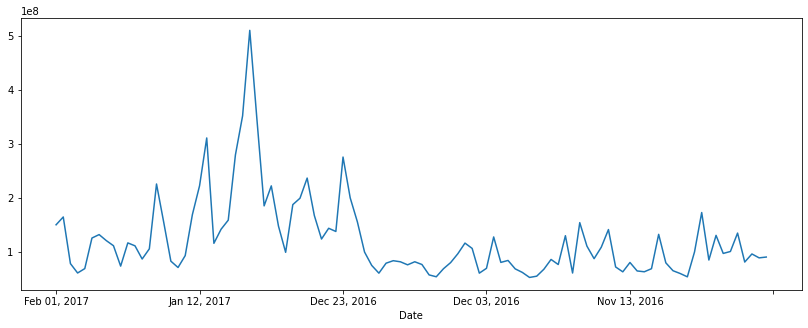

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.19 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=3819.447, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=3820.348, Time=0.01 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=3819.882, Time=0.01 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=3817.463, Time=0.01 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=3811.061, Time=0.06 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=3811.297, Time=0.07 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.19 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=3813.208, Time=0.03 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=3820.817, Time=0.02 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=3808.557, Time=0.05 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=3817.906, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=3818.367, Time=0.01 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=3809.160, Time=0.06 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=3

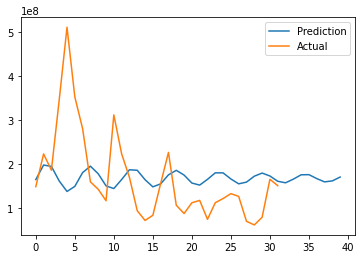

In [65]:
def use_arima(df, strColName, intPeriod):
    # fitting the data to auto-arima
    
    df[strColName] = df[strColName].str.replace(',', '').astype(float)
    
    df.set_index('Date')[strColName].plot(figsize=(14, 5))
    
    plt.show()
    
    auto_fit = auto_arima(df[strColName].iloc[::-1], trace=True, suppress_warnings=True)
    
    # printing the best model's summary
    print(auto_fit.summary())
    
    
    # training the model on data
    train = df[strColName].iloc[:30:-1]
    model = auto_fit.fit(train)

    
    # visualizing the forecast
    forecast = model.predict(n_periods = intPeriod, return_conf_int = True)
    
    print(forecast)
    plt.plot(np.array(forecast[0]), label='Prediction')
    plt.plot(np.array(df[strColName].iloc[31::-1]), label='Actual')
    plt.legend()

    
    return model, df

df = pd.read_csv("bitcoin_data.csv")
%time model, df=use_arima(df.tail(100), 'Volume', 40)

In [62]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   69
Model:               SARIMAX(2, 1, 3)   Log Likelihood               -1279.485
Date:                Thu, 09 Dec 2021   AIC                           2570.969
Time:                        11:51:42   BIC                           2584.286
Sample:                             0   HQIC                          2576.246
                                 - 69                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.8058      0.152      5.311      0.000       0.508       1.103
ar.L2         -0.9264      0.196     -4.722      0.000      -1.311      -0.542
ma.L1         -1.3041      0.178     -7.306      0.000      -1.654      -0.954
ma.L2          1.3223      0.304      4.353      0.000       0.727       1.918
ma.L3         -0.5911      0.153     -3.857      0.000      -0.892      -0.291
sigma2      1.275e+15   1.47e-16   8.65e+30      0.000    1.27e+15    1.27e+15
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                 4.87
Prob(Q):                              0.97   Prob(JB):                         0.09
Heteroskedasticity (H):               1.24   Skew:                             0.59
Prob(H) (two-sided):                  0.61   Kurtosis:                         3.58
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 1.18e+49. Standard errors may be unstable.
"""

<AxesSubplot:>

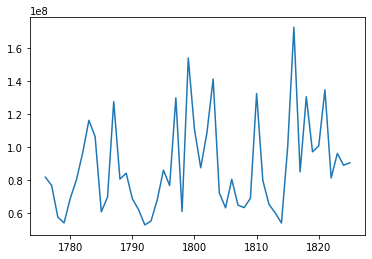

In [52]:
df.tail(50).Volume.plot()

In [10]:
train

1825      657.59
1824      678.30
1823      688.31
1822      689.65
1821      714.48
          ...   
35      47260.22
34      42843.80
33      40693.68
32      43574.51
31      44895.10
Name: Close**, Length: 1795, dtype: float64

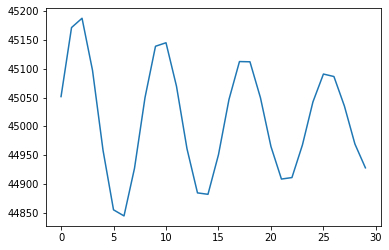

In [8]:
plt.plot(np.array(forecast[0]), label='Prediction')

In [9]:
(mean_squared_error(np.array(df['Close**'].iloc[29::-1]), np.array(forecast[0])))**1/2

69050693.85763009